# Using Data Science to Understand What Makes Wine Taste Good

## <center>Index<center>

**Part 1. EDA**
1. Data Exploration
2. Exploring correlation between variables
3. Outliers detection

**Part 2. Using Machine Learning to Predict the Quality of Wines**

A) Without outliers

B) With outliers


## Section 1: Data Exploration

In this section, we'll do some exploratory analysis to understand the nature of our data and the underlying distribution.

### First, import some necessary libraries. 

### Click the below cell block and run it.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Pretty display for notebooks
%matplotlib inline

### Next, we'll load the dataset for white wines, and display the first 5 columns. Run the below cell block

In [2]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-white.csv", sep=';')

# Display the first five records
display(data.head(n=5))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Now, let's do some basic preliminary analysis of our data:

### We'll begin by first seeing if our data has any missing information

In [3]:
# buscar nulos
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Examine the features in the data-set and their data types

In [4]:
# información de tipos de variables
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# analitica descriptiva básica
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Section 2: Exploring Relationships between features

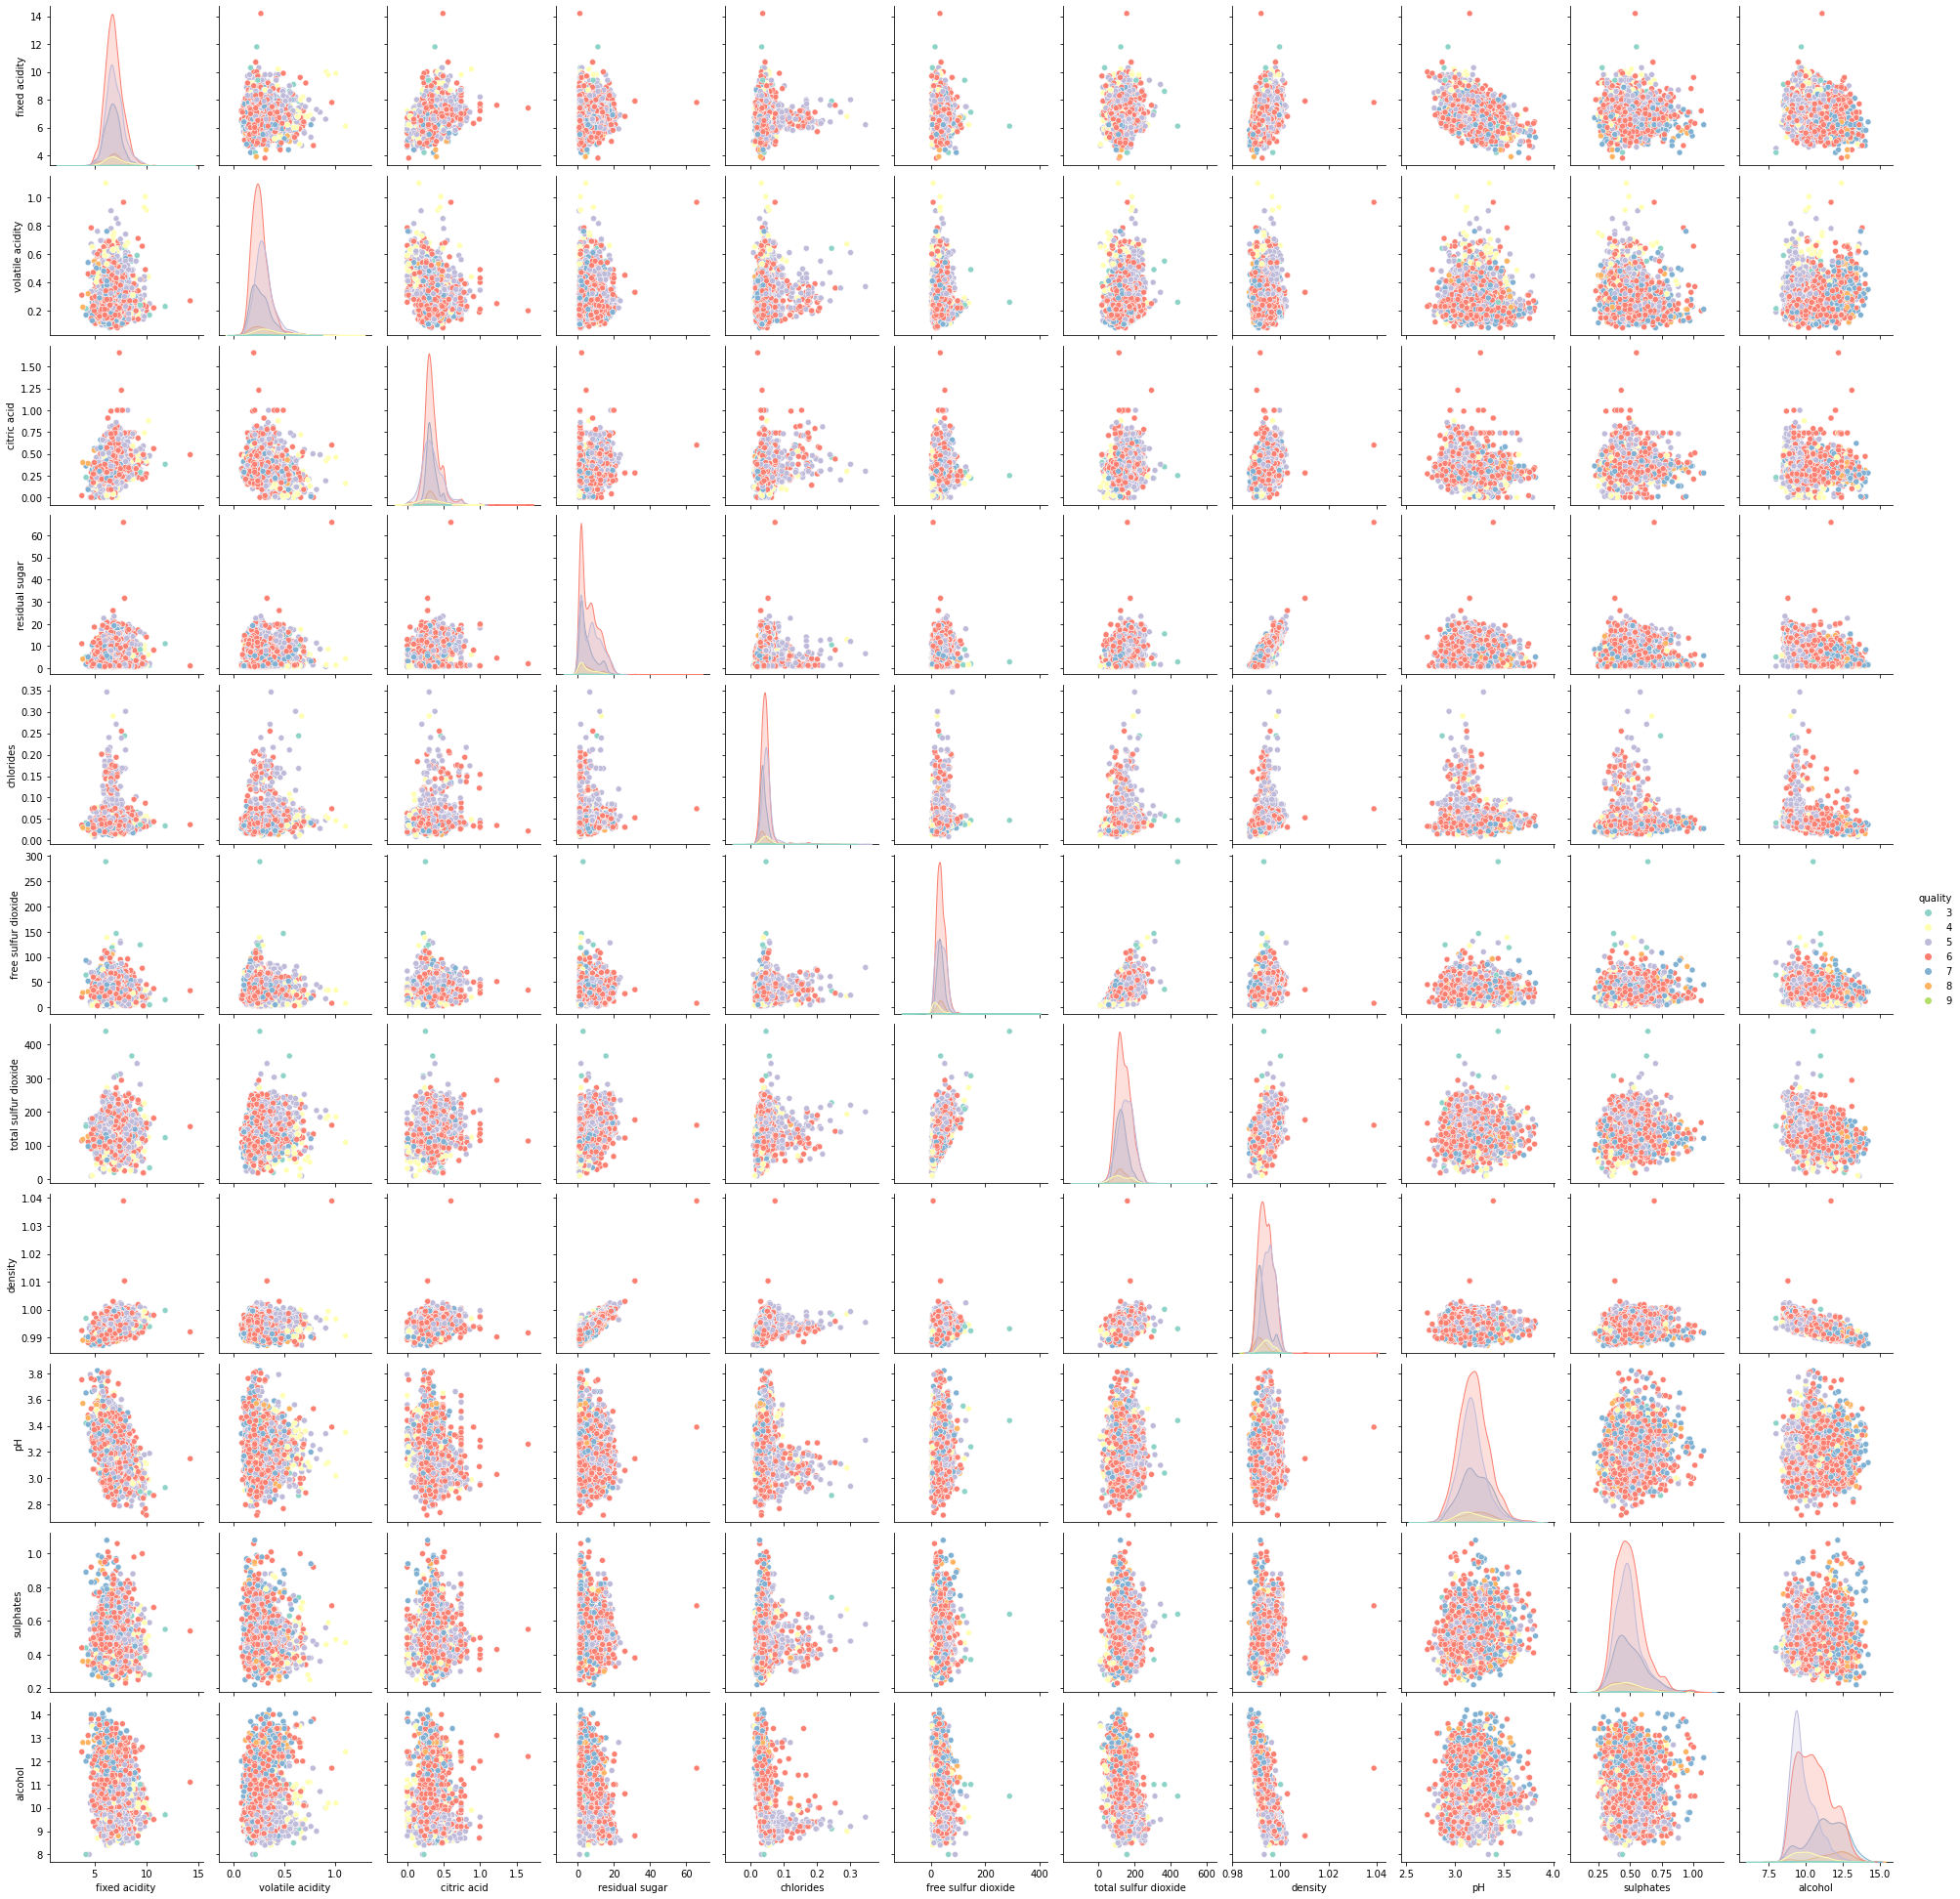

In [6]:
# Explorar las relaciones entre variables
import seaborn as sns

sns.pairplot(data,hue='quality',palette='Set3')

plt.show()


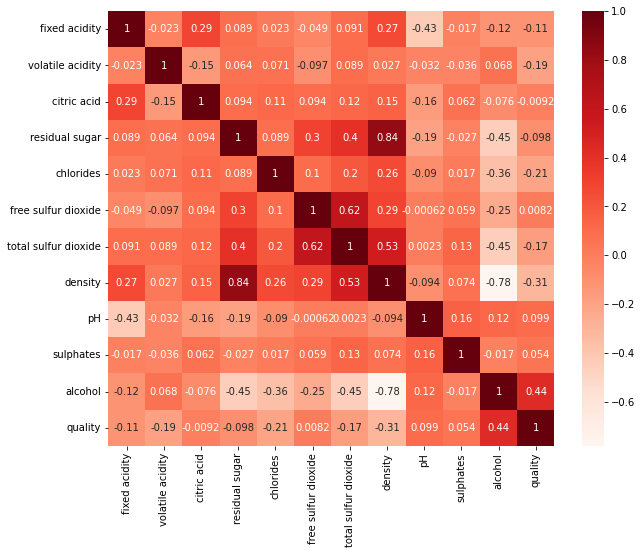

In [7]:
# Matriz de correlaciones
# sugerencia correlation = data.corr()
# sugerencia 2: sns.heatmap()

plt.figure(figsize=(10,8))
correlation = data.corr()
sns.heatmap(correlation,annot=True,cmap="Reds")
plt.show()

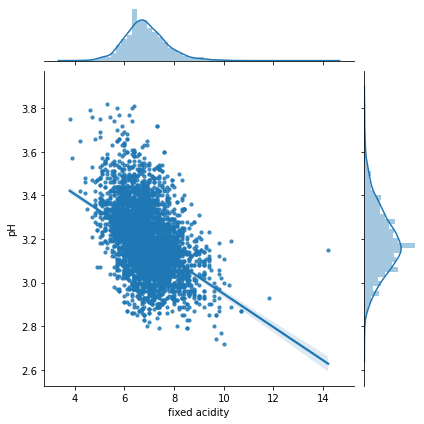

In [8]:
#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
fixedAcidity_pH = data[['pH', 'fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)


#### Citric_acid and fixed acidity

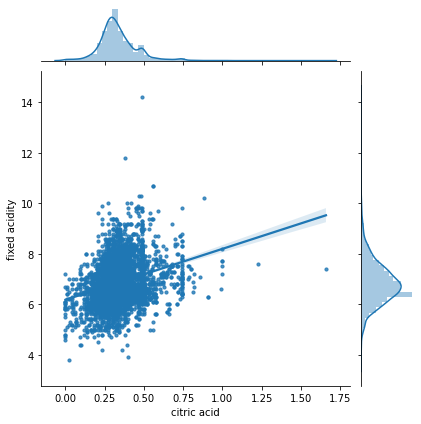

In [9]:
citricacid_pH = data[['fixed acidity','citric acid']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="citric acid", y='fixed acidity', data=citricacid_pH, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### density and fixed acidity

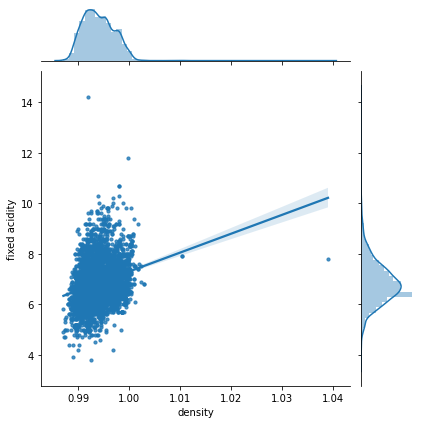

In [10]:
density_fixedacidity = data[['density','fixed acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="density", y='fixed acidity', data=density_fixedacidity, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### quality and volatile acidity

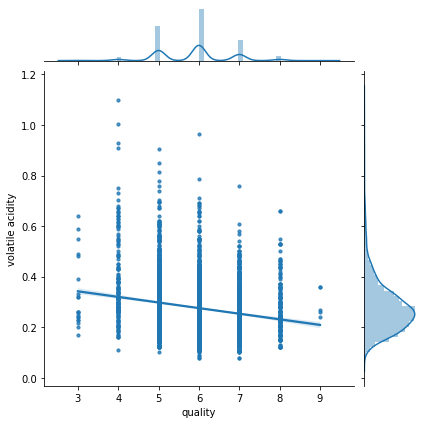

In [11]:
quality_volatileacidity = data[['quality','volatile acidity']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="quality", y='volatile acidity', data=quality_volatileacidity, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### alcohol and quality

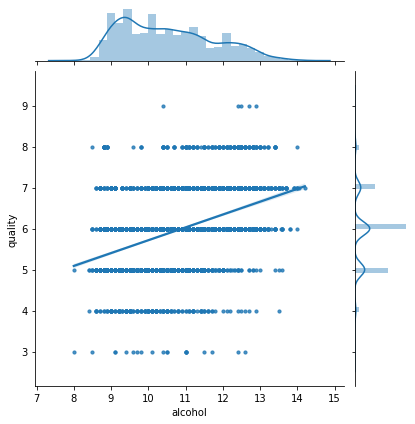

In [12]:
alcohol_quality = data[['alcohol','quality']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="alcohol", y='quality', data=alcohol_quality, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

#### Barplot quality and volatile acidity

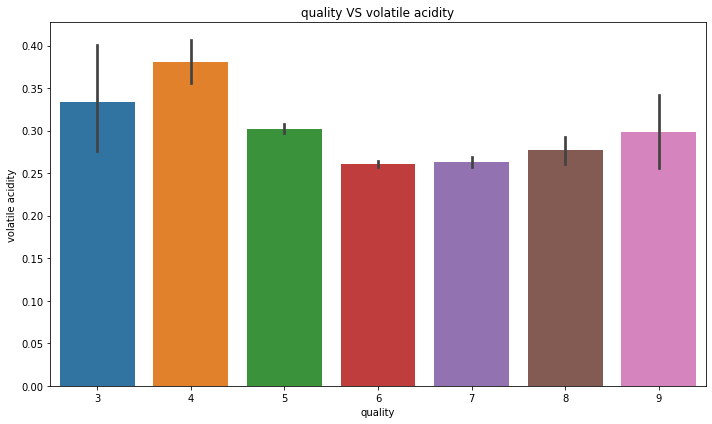

<Figure size 432x288 with 0 Axes>

In [13]:
#We can visualize relationships of discreet values better with a bar plot

volatileAcidity_quality = data[['volatile acidity','quality']]

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='volatile acidity', data=volatileAcidity_quality, ax=axs)
plt.title('quality VS volatile acidity')

plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Barplot quality and alcohol

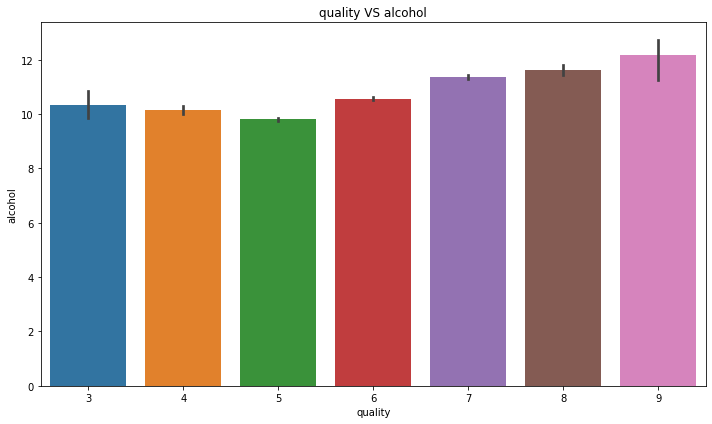

<Figure size 432x288 with 0 Axes>

In [14]:
#We can visualize relationships of discreet values better with a bar plot

quality_alcohol = data[['quality','alcohol']]

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=quality_alcohol, ax=axs)
plt.title('quality VS alcohol')

plt.tight_layout()
plt.show()
plt.gcf().clear()

## Section 3: Outlier Detection:

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An **outlier step** is calculated as **1.5** times the **interquartile range (IQR)**. A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below:

* Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.
* Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile.
* Assign the calculation of an outlier step for the given feature to step.
* Optionally remove data points from the dataset by adding indices to the outliers list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!
Once you have performed this implementation, the dataset will be stored in the variable good_data.

In [15]:
# For each feature find the data points with extreme high or low values

ind=[]
for feature in data.keys():
    
    #if feature=='quality':
        #continue
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    aux = ~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))
    i=list(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))].index.values)
    ind.append(i)
  
    
# OPTIONAL: Select the indices for data points you wish to remove
ind=  list(set(np.concatenate(ind).flat))  #set is to remove duplicates
outliers  = ind
# Remove the outliers, if any were specified
good_data = data.drop(index=outliers,axis=1).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4679,4.7,0.335,0.14,1.30,0.036,69.0,168.0,0.99212,3.47,0.46,10.5,5
4786,4.4,0.320,0.39,4.30,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.20,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8
4792,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.98981,3.53,0.92,13.8,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5
79,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5
147,6.4,0.595,0.14,5.2,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,4.4,0.540,0.09,5.1,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4860,6.0,0.520,0.33,7.7,0.046,24.0,119.0,0.99224,3.04,0.38,11.0,6
4867,5.3,0.600,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.0,6
4877,5.9,0.540,0.00,0.8,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
16,6.3,0.48,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.6,6
54,6.8,0.20,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
62,7.0,0.47,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.5,5
65,6.2,0.35,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4808,7.3,0.35,0.67,8.30,0.053,10.0,100.0,0.99590,3.19,0.50,10.9,5
4815,6.2,0.76,0.01,3.20,0.041,18.0,120.0,0.99026,3.20,0.94,13.7,7
4847,4.4,0.54,0.09,5.10,0.038,52.0,97.0,0.99022,3.41,0.40,12.2,7
4877,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,5


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5
35,7.3,0.28,0.43,1.7,0.080,21.0,123.0,0.99050,3.19,0.42,12.8,5
40,6.7,0.23,0.39,2.5,0.172,63.0,158.0,0.99370,3.11,0.36,9.4,6
41,6.7,0.24,0.39,2.9,0.173,63.0,157.0,0.99370,3.10,0.34,9.4,6
54,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4811,7.0,0.17,0.42,1.0,0.075,19.0,71.0,0.99103,3.32,0.62,11.4,6
4813,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.7,5
4820,5.8,0.36,0.50,1.0,0.127,63.0,178.0,0.99212,3.10,0.45,9.7,5
4836,6.7,0.50,0.36,11.5,0.096,18.0,92.0,0.99642,3.11,0.49,9.6,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.5,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.6,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.1,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4565,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4567,5.8,0.280,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,5
4601,6.9,0.230,0.35,6.9,0.030,45.0,116.0,0.99244,2.80,0.54,11.0,6
4744,5.0,0.240,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.600000,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.700000,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.500000,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.300000,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.200000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4.7,0.785,0.00,3.4,0.036,23.0,134.0,0.98981,3.53,0.92,13.800000,6
4815,6.2,0.760,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.700000,7
4818,6.0,0.270,0.40,1.7,0.021,18.0,82.0,0.98910,3.24,0.95,13.133333,6
4886,6.2,0.210,0.28,5.7,0.028,45.0,121.0,0.99168,3.21,1.08,12.150000,7


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8


In [16]:
#Checking that the outliers are removed

#1. We can compare the DataFrames to see that they are different
print('-> Are the DataFrames the equal?', data.equals(good_data))

#2. We can find all rows that only exist in one DataFrame.

#outer merge the two DataFrames, adding an indicator column called 'Exist'
diff_df = pd.merge(data, good_data, how='outer', indicator='Exist')

#find which rows don't exist in both DataFrames
diff_df = diff_df.loc[diff_df['Exist'] != 'both']
print('------------------------\n','-> Rows that are not in both DataFrames: ',len(diff_df),'\n',diff_df)
print('------------------------\n','-> Number of outliers removed: ',len(outliers))



-> Are the DataFrames the equal? False
------------------------
 -> Rows that are not in both DataFrames:  1040 
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
22              8.3              0.42         0.62           19.25      0.040   
24              6.3              0.48         0.04            1.10      0.046   
25              6.2              0.66         0.48            1.20      0.029   
26              6.2              0.66         0.48            1.20      0.029   
30              6.8              0.26         0.42            1.70      0.049   
...             ...               ...          ...             ...        ...   
6851            5.3              0.60         0.34            1.40      0.031   
6861            5.9              0.54         0.00            0.80      0.032   
6862            6.2              0.53         0.02            0.90      0.035   
6872            6.2              0.21         0.28            5.70      0.02

# Part 2: Using Machine Learning to Predict the Quality of Wines

### A) Without outliers

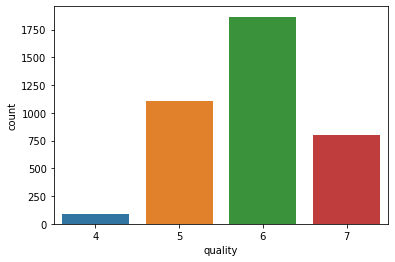

In [17]:
sns.countplot(x='quality', data=good_data);

In [18]:
good_data['quality'].value_counts()

6    1866
5    1106
7     797
4      89
Name: quality, dtype: int64

- There isn't so much data from quality=4 wines so we have to take this into account when dividing train and test datasets

In [19]:
good_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3853,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3854,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3855,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3856,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [20]:
#Displays the first 2 columns
display(data.head(n=5))
# Split the data into features and target label
X = good_data.drop(['quality','free sulfur dioxide','density','citric acid'], axis=1) #we drop them because some have almost no correlation and density 
                                                                                      #because is highly correlated with alcohol
y = good_data['quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Next, shuffle and split our data-set into training and testing subsets:

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X,y = shuffle(X,y,random_state=0)


# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    stratify=y)
# Show the results of the split

print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)


(2893, 8) (965, 8) (2893,) (965,)


### Implementation: Initial Model Evaluation


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split


- Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train) # Create the transformer StandardScaler and perform the fitting for the training data





# Normalization of train and test data using mean and variance of the training:
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)




#### 1.  Linear regression without regularization

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Coeff and intercept: {} {}'.format(lr.coef_, lr.intercept_))

Coeff and intercept: [-0.00563667 -0.15046033  0.11836074 -0.06454937  0.03686016  0.02677905
  0.04859319  0.36559531] 5.873833390943657


In [25]:
#Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

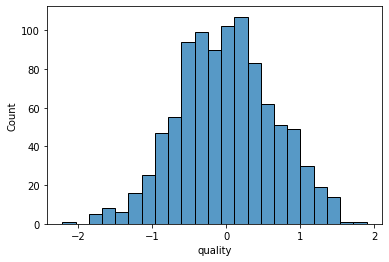

In [26]:
sns.histplot(y_test-y_test_pred)
plt.show()

#### 2. LassoCV implementation

In [27]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)

lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .4, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.00285


In [28]:
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)


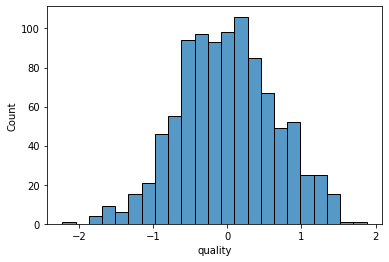

In [29]:
sns.histplot(y_test-y_test_las)
plt.show()

#### 3. RidgeCV implementation

In [30]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)



Best alpha : 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 14.0


In [31]:
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

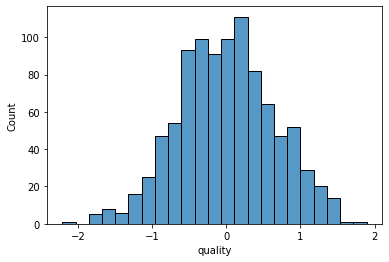

In [32]:
sns.histplot(y_test-y_test_rdg)
plt.show()

### B) With outliers

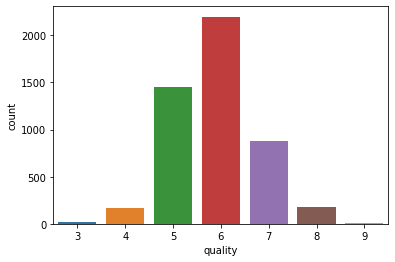

In [33]:
sns.countplot(x='quality', data=data);

In [34]:
data['quality'].value_counts() #There aren't too many data from 3 and 4 

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [35]:
#Displays the first 2 columns
display(data.head(n=5))
# Split the data into features and target label
Xc = data.drop(['quality','free sulfur dioxide','density','citric acid'], axis=1) #we drop them because some have almost no correlation and density 
                                                                                      #because is highly correlated with alcohol
yc = data['quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Next, shuffle and split our data-set into training and testing subsets:

In [36]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Xc,yc = shuffle(Xc,yc,random_state=0)


# Split the 'features' and 'income' data into training and testing sets
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc,
                                                    yc,
                                                    random_state=0,
                                                    stratify=yc)
# Show the results of the split

print(X_trainc.shape,
X_testc.shape,
y_trainc.shape,
y_testc.shape)


(3673, 8) (1225, 8) (3673,) (1225,)


### Implementation: Initial Model Evaluation


- Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scalerXc = StandardScaler().fit(X_trainc) # Create the transformer StandardScaler and perform the fitting for the training data





# Normalization of train and test data using mean and variance of the training:
X_trainc = scalerXc.transform(X_trainc)
X_testc = scalerXc.transform(X_testc)




#### 1.  Linear regression without regularization

In [38]:
lr2 = LinearRegression()
lr2.fit(X_trainc, y_trainc)
print('Coeff and intercept: {} {}'.format(lr2.coef_, lr2.intercept_))

Coeff and intercept: [-0.05927628 -0.20255708  0.12954751 -0.0179729   0.00682627  0.01504944
  0.04038277  0.44543757] 5.878028859243125


In [39]:
#Predict

y_train_predc = lr2.predict(X_trainc)
y_test_predc = lr2.predict(X_testc)

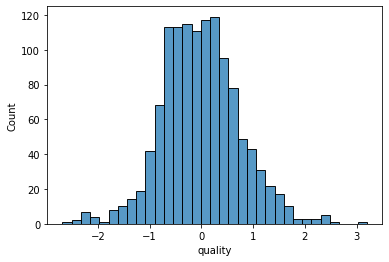

In [40]:
sns.histplot(y_testc-y_test_predc)
plt.show()

#### 2. LassoCV implementation

In [41]:
lasso2 = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)

lasso2.fit(X_trainc, y_trainc)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso2 = LassoCV(alphas = [alpha * .6, alpha * .4, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso2.fit(X_trainc, y_trainc)
alpha = lasso2.alpha_
print("Best alpha :", alpha)



Best alpha : 0.00285
Try again for more precision with alphas centered around 0.00285
Best alpha : 0.003135


In [42]:
y_train_lasc = lasso2.predict(X_trainc)
y_test_lasc = lasso2.predict(X_testc)


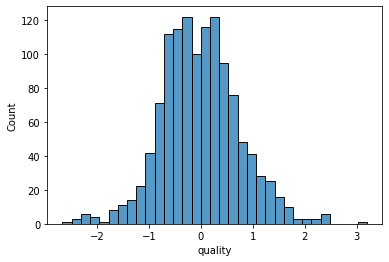

In [43]:
sns.histplot(y_testc-y_test_lasc)
plt.show()

#### 3. RidgeCV implementation

In [44]:
ridge2 = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge2.fit(X_trainc, y_trainc)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge2 = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge2.fit(X_trainc, y_trainc)
alpha = ridge2.alpha_
print("Best alpha :", alpha)



Best alpha : 14.0
Try again for more precision with alphas centered around 14.0
Best alpha : 9.799999999999999


In [45]:
y_train_rdgc = ridge2.predict(X_trainc)
y_test_rdgc = ridge2.predict(X_testc)

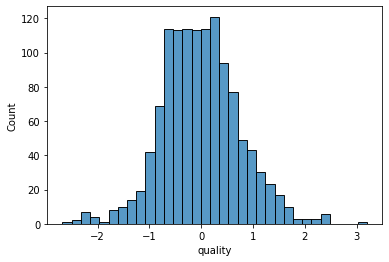

In [46]:
sns.histplot(y_testc-y_test_rdgc)
plt.show()

####  4. Final Testing

A) without outliers

In [47]:

print("Linear model")
print("------------------------------------------------------------------")
print("RMSE on Test set :", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE on Train set :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 Test", r2_score(y_test, y_test_pred))
print("R2 Train", r2_score(y_train, y_train_pred))
accuracy_train = lr.score(X_train,y_train)
print("Accuracy Train: {}".format(accuracy_train))
accuracy_test = lr.score(X_test,y_test)
print("Accuracy Test: {}".format(accuracy_test))
print("\n")

print("LassoCV model")
print("------------------------------------------------------------------")
print("Lasso RMSE on Test set :",np.sqrt(mean_squared_error(y_test, y_test_las)))
print("Lasso RMSE on Train set :", np.sqrt(mean_squared_error(y_train, y_train_las)))
print("R2 Test", r2_score(y_test, y_test_las))
print("R2 Train", r2_score(y_train, y_train_las))
accuracy_train = lasso.score(X_train,y_train)
print("Accuracy Train: {}".format(accuracy_train))
accuracy_test = lasso.score(X_test,y_test)
print("Accuracy Test: {}".format(accuracy_test))
print("\n")



print("RidgeCV model")
print("------------------------------------------------------------------")
print("Ridge RMSE on Training set :",np.sqrt(mean_squared_error(y_test, y_test_rdg)))
print("Ridge RMSE on Test set :", np.sqrt(mean_squared_error(y_train, y_train_rdg)))
print("R2 Test", r2_score(y_test, y_test_rdg))
print("R2 Train", r2_score(y_train, y_train_rdg))
accuracy_train = ridge.score(X_train,y_train)
print("Accuracy Train: {}".format(accuracy_train))
accuracy_test = ridge.score(X_test,y_test)
print("Accuracy Test: {}".format(accuracy_test))
print("\n")

Linear model
------------------------------------------------------------------
RMSE on Test set : 0.6502218274264566
RMSE on Train set : 0.6636867331095375
R2 Test 0.25627313867283297
R2 Train 0.22719943094785522
Accuracy Train: 0.22719943094785522
Accuracy Test: 0.25627313867283297


LassoCV model
------------------------------------------------------------------
Lasso RMSE on Test set : 0.6505224471499579
Lasso RMSE on Train set : 0.6637563099812961
R2 Test 0.2555852791206944
R2 Train 0.2270373910521789
Accuracy Train: 0.2270373910521789
Accuracy Test: 0.2555852791206944


RidgeCV model
------------------------------------------------------------------
Ridge RMSE on Training set : 0.6502732310339862
Ridge RMSE on Test set : 0.6636932662861245
R2 Test 0.25615554263642937
R2 Train 0.22718421633776276
Accuracy Train: 0.22718421633776276
Accuracy Test: 0.25615554263642937




B) With outliers

In [48]:

print("Linear model")
print("------------------------------------------------------------------")
print("RMSE on Test set :",  np.sqrt(mean_squared_error(y_testc, y_test_predc)))
print("RMSE on Train set :",  np.sqrt(mean_squared_error(y_trainc, y_train_predc)))
print("R2 Test", r2_score(y_testc, y_test_predc))
print("R2 Train", r2_score(y_trainc, y_train_predc))
accuracy_train = lr2.score(X_trainc,y_trainc)
print("Accuracy Train: {}".format(accuracy_train))
accuracy_test = lr2.score(X_testc,y_testc)
print("Accuracy Test: {}".format(accuracy_test))
print("\n")

print("LassoCV model")
print("------------------------------------------------------------------")
print("Lasso RMSE on Test set :", np.sqrt(mean_squared_error(y_testc, y_test_lasc)))
print("Lasso RMSE on Train set :",  np.sqrt(mean_squared_error(y_trainc, y_train_lasc)))
print("R2 Test", r2_score(y_testc, y_test_lasc))
print("R2 Train", r2_score(y_trainc, y_train_lasc))
accuracy_train = lasso2.score(X_trainc,y_trainc)
print("Accuracy Train: {}".format(accuracy_train))
accuracy_test = lasso2.score(X_testc,y_testc)
print("Accuracy Test: {}".format(accuracy_test))
print("\n")



print("RidgeCV model")
print("------------------------------------------------------------------")
print("Ridge RMSE on Test set :", np.sqrt(mean_squared_error(y_testc, y_test_rdgc)))
print("Ridge RMSE on Train set :", np.sqrt(mean_squared_error(y_trainc, y_train_rdgc)))
print("R2 Test", r2_score(y_testc, y_test_rdgc))
print("R2 Train", r2_score(y_trainc, y_train_rdgc))
accuracy_train = ridge2.score(X_trainc,y_trainc)
print("Accuracy Train: {}".format(accuracy_train))
accuracy_test = ridge2.score(X_testc,y_testc)
print("Accuracy Test: {}".format(accuracy_test))
print("\n")

Linear model
------------------------------------------------------------------
RMSE on Test set : 0.7497359395791038
RMSE on Train set : 0.7605485149613836
R2 Test 0.2824573317751029
R2 Train 0.26264315925610615
Accuracy Train: 0.26264315925610615
Accuracy Test: 0.2824573317751029


LassoCV model
------------------------------------------------------------------
Lasso RMSE on Test set : 0.7504297520186832
Lasso RMSE on Train set : 0.7606080741355101
R2 Test 0.2811286762960482
R2 Train 0.2625276687037733
Accuracy Train: 0.2625276687037733
Accuracy Test: 0.2811286762960482


RidgeCV model
------------------------------------------------------------------
Ridge RMSE on Test set : 0.7498332499720577
Ridge RMSE on Train set : 0.7605507549292961
R2 Test 0.2822710558166689
R2 Train 0.2626388159221489
Accuracy Train: 0.2626388159221489
Accuracy Test: 0.2822710558166689




> The accuracy is better considering outliers.